# Fetch Rewards Coding Exercise

**To do list:**
- Review unstructured JSON data and diagram a new structured relational data model
- Generate a query that answers a predetermined business question
- Generate a query to capture data quality issues against the new structured relational data model
- Write a short email or Slack message to the business stakeholder


## Part 1. Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

Here is my new structured relational data model:
First table is Users. It has user_id as primary key and the created_date for this user.<br>
CREATE TABLE Users(<br>
\_id integer primary key,<br>
created_date datetime,<br>
);<br>

Second table is Brands. It has brand_id as primary key and the topBrand column to note if the brand is topBrand or not.<br>
CREATE TABLE Brands(<br>
\_id integer primary key,<br>
topBrand boolean,<br>
);<br>

Third table is Receipts. It has receipt_id as primary key. users_id as foreign key referenced to Users table. The other date_scanned
CREATE TABLE Receipts(<br>
\_id integer primary key,<br>
users_id integer,<br>
date_scanned datetime,<br>
date_purchased datetime,<br>
total_number_purchased integer,<br>
total_spent float,<br>
reward_receipt_status enum,<br>
);<br>

CREATE TABLE Purchases(<br>
receipt_id integer,<br>
brand_id integer,<br>
quantity,<br>
spent,<br>
);<br>

## Part 2. Write a query that directly answers a predetermined question from a business stakeholder

### Question: What are the top 5 brands by receipts scanned for most recent month?
Here we will count across recent month for each brands that each brand is scanned. I put specific dates just to simplify.<BR>
SQL query:<br>
SELECT p.brand_id, count(*) AS 'freq_scanned'<BR>
FROM receipts r JOIN purchases p ON r._id=p.receipt_id<BR>
WHERE datediff(curdate(),date_scanned) \<= 30 <BR>
GROUP BY p.brand_id<BR>
ORDER BY freq_scanned DESC<BR>
LIMIT 5<BR>

### Question: How does the ranking of the top 5 brands by receipts scanned for the recent month compare to the ranking for the previous month?
We can use subquery of the previous month with brand_id and the freq_scanned join with the current month result. Then use window function rank to compare.

SQL query: <>
SELECT T1.brand_id, rank() over (order by T1.freq_scanned) as 'Recent_month_rank', rank() over (order by T2.freq_scanned) as 'Previous_month_rank' <BR>
FROM (<BR>
   SELECT p.brand_id, count(\*) AS 'freq_scanned'<BR>
   FROM receipts r JOIN purchases p ON r._id=p.receipt_id<BR>
   WHERE datediff(curdate(),date_scanned) \<= 30 <BR>
   GROUP BY p.brand_id<BR>
   ORDER BY freq_scanned DESC) T1 <BR>
   JOIN (<BR>
   SELECT p.brand_id, count(\*) AS 'freq_scanned'<BR>
   FROM receipts r JOIN purchases p ON r._id=p.receipt_id<BR>
   WHERE 30 \< datediff(curdate(),date_scanned) \<= 60 <BR>
   GROUP BY p.brand_id<BR>
   ORDER BY freq_scanned DESC) T2 ON T1.brand_id=T2.brand_id<BR>
    

## Part 3. Evaluate Data Quality Issues in the Data Provided

First of all, we need to read in json files and check if what the data looks like.

In [11]:
import pandas as pd
data_dir='./data/FetchReward/'
data_file= ['brands','receipts','users']
brands_df = pd.read_json(data_dir+data_file[0]+'.json', lines=True)
receipts_df = pd.read_json(data_dir+data_file[1]+'.json', lines=True)
users_df=pd.read_json(data_dir+data_file[2]+'.json', lines=True)

In [12]:
brands_df

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves


The dataframe has 1167 records with 8 columns. We can see that there is 'NaN' value in column 'categoryCode', 'topBrand', 'brandCode'. So we can check how many of records has this issue.

<AxesSubplot:>

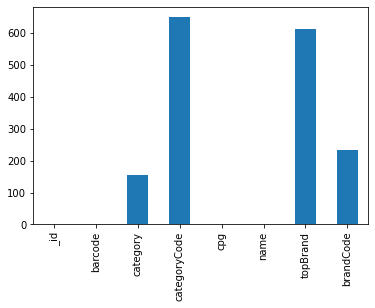

In [13]:
brands_df.isna().sum().plot(kind='bar')

This bar plot shows the counts of null values in each of the column in this data. Considering the total records number is 1167 and we can see the Null value count can be as high as 600. This means nearly half of the data are having null values in those column. This is one issue in the dataset.

## Part 4. Communicate with Stakeholders
### What questions do you have about the data?
What is the most important question that the stakeholder want to know? <br>
What is the key metric to measure any improvements on sales?<br>

### How did you discover the data quality issues?
Using pandas dataframe we can easily get the statistical of the datasets and notice quality issues that may have.<br>
Besides null value, there are nested data column in receipts. 

### What do you need to know to resolve the data quality issues?
Firstly, We need to check the data source and see where does the issue comes from. Why there are null values in the data. <br>
Then, we need to know does the null value stands for zero or it means not applicable. We need to clarify the meaning. We can decide to correct those by filling in values for the specific meaning.<br>
Additionally, We can also put constraints on the table to make sure future data that doesn't meet the constraint will not be permitted in the database.

### What other information would you need to help you optimize the data assets you're trying to create?
What data that we don't need so we can make the data table cleaner.<br>
What data will be constantly accessed and we can store those data on faster physical medium and improve the performance.<br>
what does cpg mean?

### What performance and scaling concerns do you anticipate in production and how do you plan to address them?
In production, the receipt table size will increase as times go by. When the table becomes huge, it will be slow to access the data.
We can use partition method to store data. There are vertical partitioning and horizontal partitioning methods. Vertical partitioning can aim at seldomly visited columns and put those on slower physical medium. This can improve query performance. Horizontal partitioning can split the table into different seasons partition or months partition.